# Chapter 1: Bayesian Inference

Modern Bayesian statistics is mostly performed using computer code. This has dramatically changed how Bayesian statistics was performed from even a few decades ago. The  complexity of models we can build has increased, and the barrier of necessary mathematical  and computational skills has been lowered.

Models are human-designed representations with very specific  goals in mind.

Building a model requires a combination of domain expertise and statistical skill to incorporate knowledge into some computable objectives and determine the usefulness of the result. Data is the raw material, and statistical distributions are the main mathematical tools to shape the statistical model. (Like a sculptor uses a chisel to shape a block of marble.)

Bayesian models, computational or otherwise, have two defining characteristics:
- Parameters: Unknown quantities are described using probability distributions 
- Bayes’ theorem: which is used to update the values of the parameters conditioned on the data. 

At a high-level we can describe the process of constructing Bayesian modeling in 3 iterative steps:
1. Designing a Model: Given some data and some assumptions on how this data could have been generated, we design a model by combining and transforming random variables.  
1. Process Inference: We use Bayes’ theorem to condition our models to the available data obtaining a posterior distribution. We hope the  data reduces the uncertainty for possible parameter values, though this is not a guaranteed of any Bayesian model.   
1. Model Evaluation: We criticize the model by checking whether the model makes sense according to different criteria, including the data and our expertise on the domain-knowledge.  Because we generally are uncertain about the models themselves, we sometimes  compare several models.  


Bayesian inference is a particular form of statistical inference based on combining  probability distributions in order to obtain other probability distributions. Bayes’ theorem  provides us with a general recipe to estimate the value of the parameter θ given that we  have observed some data Y: 

$$P(\theta|Y) = \frac{P(Y|\theta)P(\theta)}{P(Y)}$$

Where:
- $P(\theta|Y)$ is the posterior distribution of the parameter θ given the data Y
- $P(Y|\theta)$ is the likelihood of the data Y given the parameter θ
- $P(\theta)$ is the prior distribution of the parameter θ
- $P(Y)$ is the marginal likelihood of the data Y

RK = The log scale is preferred to perform calculations as computations are numerically more stable. 

As you can see evaluating the posterior at each specific point is conceptually simple, we  just need to multiply a prior times a likelihood. However, that is not enough to inform us  about the posterior, as we not only need the posterior probability at that specific point,  but also in relation to the surrounding points. This global information of the posterior  distribution is represented by the normalizing constant. Unfortunately, difficulties arise  from the need to compute the normalizing constant p(Y). 

RK = One nice feature of Bayesian statistics is that the posterior is (always) a distribution. This  fact allows us to make probabilistic statements about the parameters.

We just need  to remember that all these nice mathematical properties are only valid in the platonic world  of ideas where mathematical objects such as spheres, Gaussians and Markov chains exist.  As we move from mathematical purity into the applied math messiness of the real world  we must always keep in mind that our results are conditioned not only on the data but  also on the models. Consequently, bad data and/or bad models could lead to nonsensical  statements, even if they are mathematically consistent. We must always have a healthy  quota of skepticism about our data, models, and results.

Universal Inference Engines: numerical methods that allow us to approximate the posterior distribution. These methods are the workhorses of Bayesian statistics. The most widely and powerful methods are Markov Chain Monte Carlo Methods (known as samplers). An example of algorithm is the Metropolis-Hastings. (https://www.youtube.com/watch?v=yCv2N7wGDCw)

To make things more concrete let us try to solve the Beta-Binomial model. This is  probably the most common example in Bayesian statistics, and it is used to model binary,  mutually-exclusive outcomes such as 0 or 1, positive or negative, head or tails, spam or  ham, hotdog or not hotdog, healthy or unhealthy, etc. More often than not Beta-Binomial  model is used as the first example to introduce the basics of Bayesian statistics, because it  is a simple model that we can solve and compute with ease. In statistical notation we can  write the Beta-Binomial models as: 

$$\theta \sim Beta(α, β)$$ 
$$Y \sim Binomial(n=1, p=\theta)$$

Where:
- θ is the parameter of the model
- α and β are the hyperparameters of the prior distribution
- Y is the data


In [23]:
import numpy as np
from scipy import stats
import arviz as az

az.style.use("arviz-grayscale")

def post(θ, Y, α=1, β=1):
    if 0 <= θ <= 1:
        prior = stats.beta(α, β).pdf(θ)
        like  = stats.bernoulli(θ).pmf(Y).prod()
        prop = like * prior
    else:
        prop = -np.inf
    return prop
    

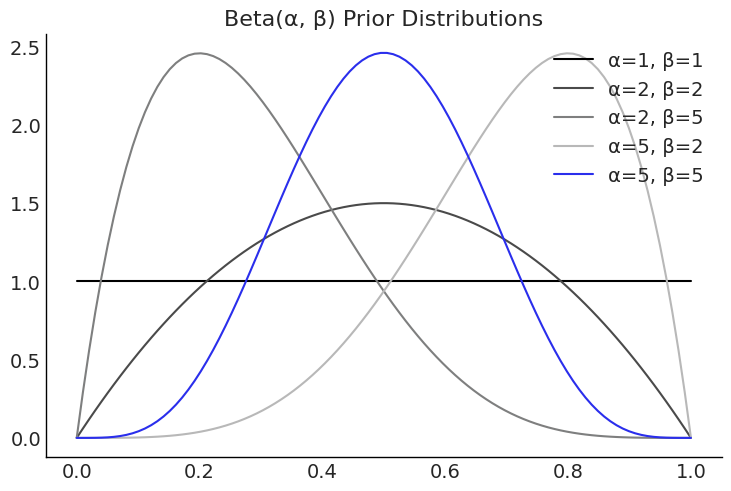

In [24]:
# create a plot of the prior distribution using beta distribution
import matplotlib.pyplot as plt

θ = np.linspace(0, 1, 100)

plt.plot(θ, stats.beta(1, 1).pdf(θ), label='α=1, β=1')
plt.plot(θ, stats.beta(2, 2).pdf(θ), label='α=2, β=2')
plt.plot(θ, stats.beta(2, 5).pdf(θ), label='α=2, β=5')
plt.plot(θ, stats.beta(5, 2).pdf(θ), label='α=5, β=2')
plt.plot(θ, stats.beta(5, 5).pdf(θ), label='α=5, β=5')
plt.legend()
plt.title('Beta(α, β) Prior Distributions')
plt.show()

In [25]:
Y = stats.bernoulli(0.7).rvs(20)

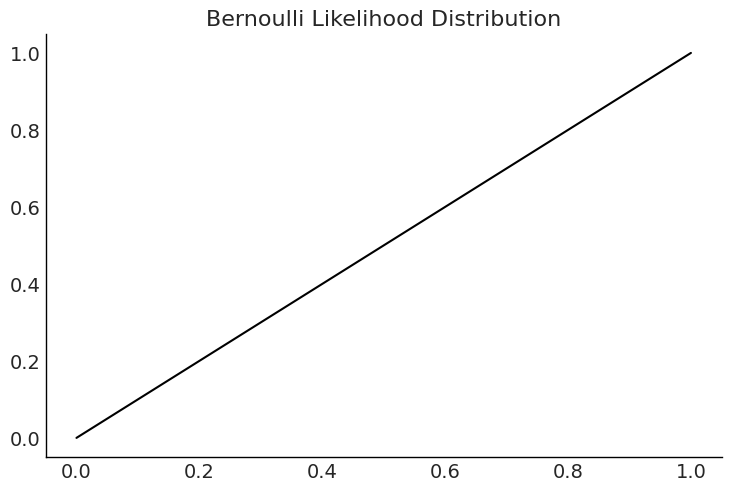

In [26]:
# create a plot of the likelihood distribution using bernoulli distribution
θ = np.linspace(0, 1, 100)

plt.plot(θ, stats.bernoulli(θ).pmf(1))
plt.title('Bernoulli Likelihood Distribution')
plt.show()

In [27]:
# count the number of heads
Y.sum()

14

In [28]:
# the .rvs method generates random numbers from the distribution 
stats.norm(0.5, 0.05).rvs(1) 

array([0.517879])

In [29]:
{'θ':np.zeros(5)}

{'θ': array([0., 0., 0., 0., 0.])}

In [30]:
# Metropolis-Hastings
n_iters = 1000
can_sd = 0.05
α = β = 1
θ = 0.5
trace = {'θ':np.zeros(n_iters)}
p2 = post(θ, Y, α, β)

for iter in range(n_iters):
    θ_can = stats.norm(θ, can_sd).rvs(1)
    p1 = post(θ_can, Y, α, β)
    pa = p1 / p2

    if pa > stats.uniform(0, 1).rvs(1):
        θ = θ_can
        p2 = p1

    trace['θ'][iter] = θ

C:\Users\cg08900\AppData\Local\Temp\ipykernel_30968\3649566805.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  trace['θ'][iter] = θ


Text(0, 0.5, 'θ')

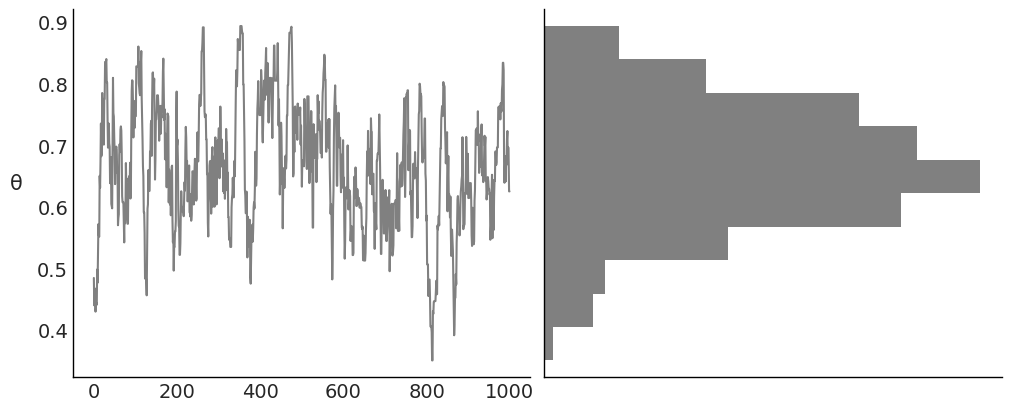

In [31]:
_, axes = plt.subplots(1,2, figsize=(10, 4), constrained_layout=True, sharey=True)
axes[1].hist(trace['θ'], color='0.5', orientation="horizontal", density=True)
axes[1].set_xticks([])
axes[0].plot(trace['θ'], '0.5')
axes[0].set_ylabel('θ', rotation=0, labelpad=15)

In [32]:
az.summary(trace, kind='stats', round_to=2)

,mean,sd,hdi_3%,hdi_97%
θ,0.67,0.1,0.52,0.89


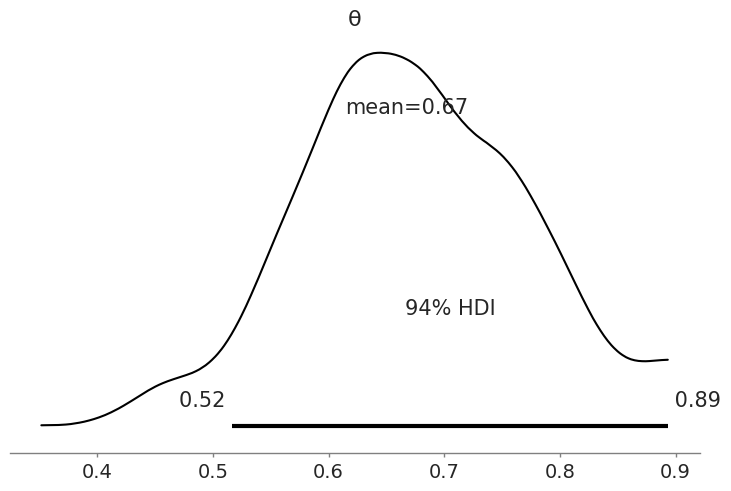

In [33]:
az.plot_posterior(trace)
plt.show()